In [1]:
!pip install rdkit -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 31.5 MB/s eta 0:00:00


In [46]:
import pandas as pd
import numpy as np

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

In [47]:
# upload this file to collab or clone this repo and add `data` directory with data
corneal = pd.read_csv('data/corneal.csv')
corneal.head()

,SMILES,logPerm
0,CC1CC2C3CCC(C3(CC(C2(C4(C1=CC(=O)C=C4)C)F)O)C)...,5.14
1,CC(C1=CC(=C(C=C1)C2=CC=CC=C2)F)C(=O)O,5.35
2,CC(C1=CC(=C(C=C1)C2=CC=CC=C2)F)C(=O)N,5.39
3,C(C(CO)O)O,3.81
4,CC12CCC(=O)C=C1CCC3C2C(CC4(C3CCC4(C(=O)CO)O)C)O,4.44


In [48]:
descriptor_list = Descriptors.descList
descriptors = []

for descriptor in descriptor_list:
      descriptors.append(descriptor[0])

def get_descriptor_values(mol, descriptors):
    calc = MolecularDescriptorCalculator(descriptors)
    ds = calc.CalcDescriptors(mol)
    return ds[0]


for i in descriptors:
    corneal[i] = pd.Series(np.array([get_descriptor_values(Chem.MolFromSmiles(j), [i]) for j in corneal["SMILES"]]), index=corneal.index)

corneal.head()

,SMILES,logPerm,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CC1CC2C3CCC(C3(CC(C2(C4(C1=CC(=O)C=C4)C)F)O)C)...,5.14,16.87,16.87,0.00,-1.92,0.74,54.04,376.47,347.24,...,0,0,0,0,0,0,0,0,0,0
1,CC(C1=CC(=C(C=C1)C2=CC=CC=C2)F)C(=O)O,5.35,13.97,13.97,0.40,-0.96,0.89,12.11,244.26,231.16,...,0,0,0,0,0,0,0,0,0,0
2,CC(C1=CC(=C(C=C1)C2=CC=CC=C2)F)C(=O)N,5.39,14.01,14.01,0.34,-0.48,0.88,12.11,243.28,229.17,...,0,0,0,0,0,0,0,0,0,0
3,C(C(CO)O)O,3.81,8.17,8.17,0.36,-0.95,0.38,10.00,92.09,84.03,...,0,0,0,0,0,0,0,0,0,0
4,CC12CCC(=O)C=C1CCC3C2C(CC4(C3CCC4(C(=O)CO)O)C)O,4.44,12.36,12.36,0.07,-1.54,0.70,50.50,362.47,332.23,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# удаление колонок с одинаковыми значениями

for i in list(corneal.head(0)):
    if len(corneal[i].unique()) == 1:
      corneal.drop([i], axis=1, inplace=True)


corneal.shape

(120, 180)

In [50]:
!pip install lazypredict -q

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from lazypredict.Supervised import LazyRegressor

import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
X = corneal.drop(['logPerm', 'SMILES'], axis=1)
y = corneal['logPerm']

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Масштабирование данных
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [53]:
# Инициализация и обучение моделей
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Вывод результатов
models

100%|██████████| 42/42 [00:10<00:00,  4.19it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2685
[LightGBM] [Info] Number of data points in the train set: 96, number of used features: 128
[LightGBM] [Info] Start training from score 4.144390
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,24369802053864609116461295180083136608698426046...,-1642312747108267114131130761741494156238088151...,203340731412510007065165564453900626427904.00,0.13
SGDRegressor,2382198010.98,-16053943109.71,201042.24,0.02
TransformedTargetRegressor,2.42,-8.55,4.90,0.31
LinearRegression,2.42,-8.55,4.90,0.11
KernelRidge,2.29,-7.68,4.68,0.03
GaussianProcessRegressor,2.11,-6.48,4.34,0.10
LinearSVR,1.22,-0.45,1.91,0.04
DecisionTreeRegressor,1.21,-0.41,1.89,0.04
HuberRegressor,1.18,-0.21,1.75,0.10


In [54]:
# обучение модели
ET_reg = ExtraTreesRegressor(random_state=42)
ET_reg.fit(X_train, y_train)

# Оценка ET_reg модели
pred = ET_reg.predict(X_test)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"Базовая модель:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")

Базовая модель:
MAE: 0.7330
MSE: 0.8626
R2: 0.6574


In [55]:
importances = ET_reg.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

Shown features: 50/178


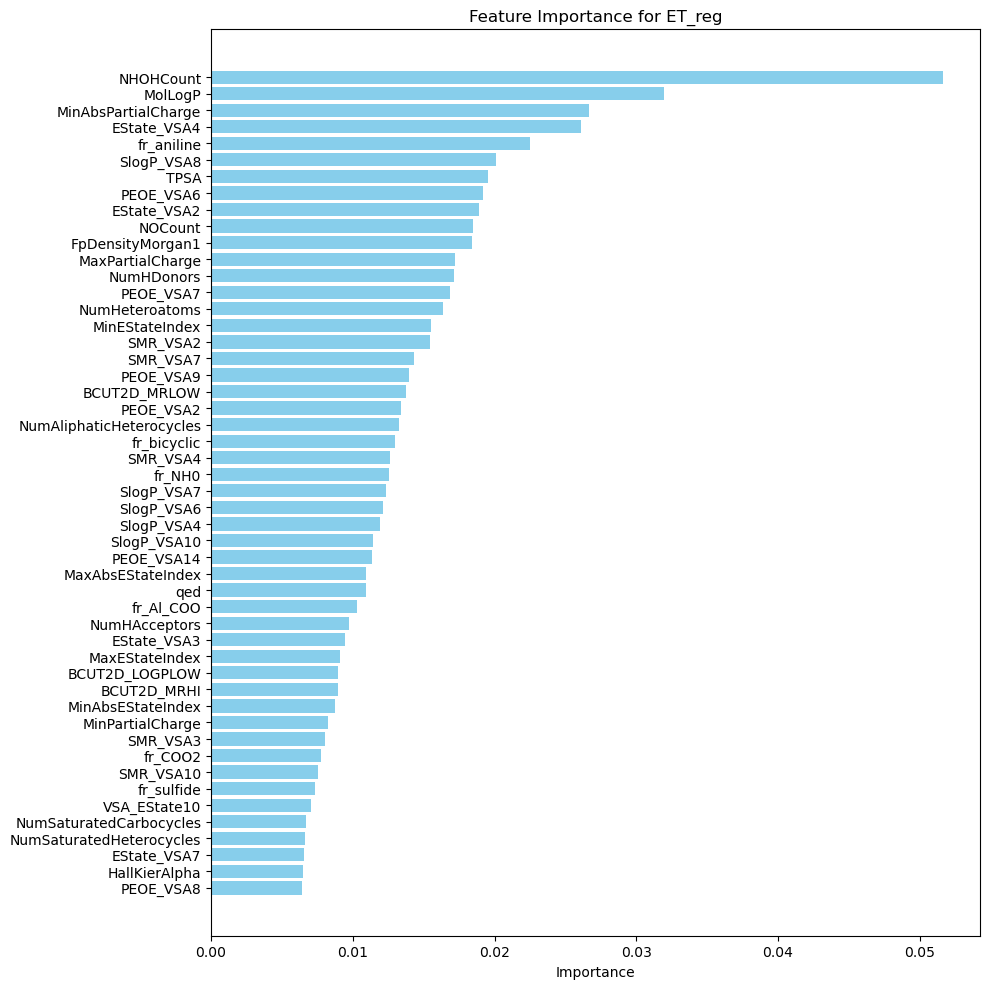

In [56]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

N_show = 50
visualization_df = feature_importance_df.head(N_show)
print(f"Shown features: {N_show}/{len(feature_importance_df)}")

plt.figure(figsize=(10, 10))
plt.barh(visualization_df['Feature'], visualization_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance for ET_reg')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [57]:
threshold = 0.00050

# Отбор признаков по порогу
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]

print("Отобранные признаки:")
print(selected_features.shape)

Отобранные признаки:
(156, 2)


In [58]:
X_sel = corneal.drop(['logPerm', 'SMILES'], axis=1)[selected_features['Feature'].values]
y = corneal['logPerm']

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_sel, y, test_size=0.2, random_state=42
)

# Масштабирование данных
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# обучение модели
ET_reg_sel = ExtraTreesRegressor(random_state=42)
ET_reg_sel.fit(X_train, y_train)

# Оценка ET_reg_sel модели
pred = ET_reg_sel.predict(X_test)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"ET_reg_sel модель:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")

ET_reg_sel модель:
MAE: 0.7249
MSE: 0.8564
R2: 0.6598


### Save model to the file

In [59]:
import joblib

# config is a local config.py file strored in the root of this direcotry
from config import MODELS_SAVE_PATH


In [60]:
model_path = MODELS_SAVE_PATH.joinpath('ET_reg_sel_model.pkl')
scaler_path = MODELS_SAVE_PATH.joinpath('minmax_scaler.pkl')

joblib.dump(ET_reg_sel, model_path)

# NOTE: we must save scaler too!
joblib.dump(sc, scaler_path)

print(f"Model and scaler are saved to: \n{model_path}\n{scaler_path}")

Model and scaler are saved to: 
custom_scoring/models/ET_reg_sel_model.pkl
custom_scoring/models/minmax_scaler.pkl


### Test model load

In [62]:
ET_reg_sel_loaded = joblib.load(model_path)
print(f"Model loaded from '{model_path}'.")

sc_loaded = joblib.load(scaler_path)
print(f"Scaler loaded from '{scaler_path}'.")

Model loaded from 'custom_scoring/models/ET_reg_sel_model.pkl'.
Scaler loaded from 'custom_scoring/models/minmax_scaler.pkl'.


In [66]:
# load unscaled data again
X_train, X_test, y_train, y_test = train_test_split(
    X_sel, y, test_size=0.2, random_state=42
)

X_test = sc_loaded.transform(X_test)


pred = ET_reg_sel_loaded.predict(X_test)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"ET_reg_sel модель:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")

ET_reg_sel модель:
MAE: 0.7249
MSE: 0.8564
R2: 0.6598
